In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
# read and clean data by removing unwanted text and spaces

# use a separator that will never appear in the txt file.
data = pd.read_csv("data/1_pixel2", header=None, sep="~")

# take only the first 24 characters, which is the timestamp portion 
# e.g. 22 Sep 2020 16:15:54:625 in 22 Sep 2020 16:17:12:674: (1.3210017, 103.8602953)
data[0] = data[0].str[0:24].str.strip()

data["timestamp"] = pd.to_datetime(data[0], format="%d %b %Y %H:%M:%S:%f")

In [37]:
group1min = data.groupby(pd.Grouper(key="timestamp",freq="1min")).count()
group5min = data.groupby(pd.Grouper(key="timestamp",freq="5min")).count()
# rename the column name to count
group1min.rename( columns={0: "count"}, inplace=True)
group5min.rename( columns={0: "count"}, inplace=True)

len(group1min["count"].value_counts())
len(group5min["count"].value_counts())

5

In [38]:
# calculate results for 1 minute intervals
g1_total_rows = len(group1min)
g1_misses = group1min["count"].value_counts().get(0,0) # get value for key 0, if it doesnt exist we return 0 which means 
g1_score = (g1_total_rows - g1_misses)/g1_total_rows
# print(g1_score)
group1min.loc[group1min["count"] == 0]

,count
timestamp,


In [39]:
# calculate results for 5 minute intervals
g5_total_rows = len(group5min)
g5_misses = group5min["count"].value_counts().get(0, 0) # get value for key 0, if it doesnt exist we return 0 which means no misses.
g5_score = (g5_total_rows - g5_misses)/g5_total_rows
# print(g5_score)
group5min.loc[group5min["count"] == 0]

,count
timestamp,


Looking at data from 22 Sep 2020 16:15:54:625 to 23 Sep 2020 11:03:57:602
1 min intervals: 100.00% missing 0 intervals
5 min intervals: 100.00% missing 0 intervals


Text(0.5, 1.0, 'Experiment 4 - 16 Sept 10:14pm to 17 Sept 7:05pm')

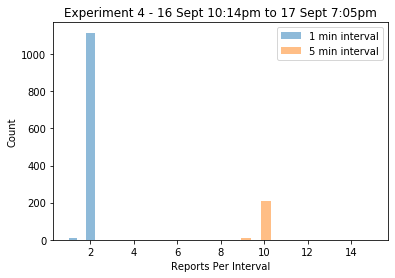

In [40]:
print("Looking at data from", data[0].iloc[0] , "to" , data[0].iloc[-1])
print("1 min intervals:", "{0:.2%}".format(g1_score) , "missing" , g1_misses , "intervals")
print("5 min intervals:", "{0:.2%}".format(g5_score) , "missing" , g5_misses , "intervals")

fig = plt.figure()
ax = fig.add_subplot(111)
_ = ax.hist(group1min.values, bins=15, alpha=.5)
_ = ax.hist(group5min.values, bins=15, alpha=.5)
ax.legend(["1 min interval", "5 min interval"])
ax.set_xlabel("Reports Per Interval")
ax.set_ylabel("Count")
ax.set_title("Experiment 4 - 16 Sept 10:14pm to 17 Sept 7:05pm")